In [1]:
import pandas as pd

# Vraag 1: In hoeveel procent van de wedstrijden wordt er niet gescoord? (Gemakkelijk 4)

SQL Oplossing:
- "SELECT COUNT(*) FROM wedstrijden WHERE standthuis = 0 AND standuit = 0"
- "SELECT COUNT(*) FROM wedstrijden"

In [3]:
percentage = 1544/18630*100
print("Aantal wedstrijden waar geen enkele ploeg heeft gescoord: ", percentage)

Aantal wedstrijden waar geen enkele ploeg heeft gescoord:  8.287707997852925


Antwoord: In 1544 van de 18630 wedstrijden werd er Niet gescoord. In percentage komt dit uit op 8,3 %.

# Vraag 2: Is er in de historische voetbaldata een ploeg terug te vinden die geen enkele of 1 match gewonnen heeft gedurende de volledige competitie van één seizoen? (Gemiddled 5)


In [57]:
columns = ["matchkey", "datekey", "tijdkey", "huisploegkey", "uitploegkey", "minuutgoal", "tijdkeygoal",
      "goalploegkey", "huisstand", "uitstand", "huisstandeind", "uitstandeind"]

# methode read_csv()
# params:
#   - naam van de csv file
#   - header=None -> Als je dit niet doet valt de eerste row weg
df = pd.read_csv("doelpunten_final.csv", header=None, sep=",", encoding="latin")
# voeg de kolom namen toe
df.columns = columns
# We hebben enkel de finale stand nodig en de datekey van de wedstrijd
# dus hebben we maar 1 datapunt per wedstrijd nodig aangezien dit in elke staat
df = df.drop_duplicates(subset=["matchkey"])

In [58]:
columns = ["pk", "stamnummer", "groepnaam"]

# methode read_csv()
# params:
#   - naam van de csv file
#   - header=None -> Als je dit niet doet valt de eerste row weg
dfPloegen = pd.read_csv("dimPloeg.csv", header=None, sep=",", encoding="latin")
# voeg de kolom namen toe
dfPloegen.columns = columns
# We hebben enkel de ploegkeys nodig
PloegKeys = dfPloegen["pk"].tolist()

In [59]:
columns = ["datum", "dag", "kwartaal", "dateKey", "datumUSA", "datumint", "seizoen", "speeldag"]

# methode read_csv()
# params:
#   - naam van de csv file
#   - header=None -> Als je dit niet doet valt de eerste row weg
dfDatums = pd.read_csv("dimDatum.csv", header=None, sep=",", encoding="latin")
# voeg de kolom namen toe
dfDatums.columns = columns
dfDatums = dfDatums.drop_duplicates(subset=["seizoen"], keep="last")
# We hebben enkel de laatste datekey van elk seizoen nodig
finalDates = dfDatums["dateKey"].tolist()

In [60]:
# Aantal keer dat een ploeg een seizoen geen enkele keer heeft gewonnen
aantalLosers = 0
# We itereren over alle ploegen
for x in PloegKeys:
    prevY = 0
    # We itereren over alle laatste datums van het seizoen
    for y in finalDates:
        wins = 0
        # Alle matches die de ploeg vanuit thuis heeft gespeeld
        # De datekey van het doelpunten datapunt moet groter zijn dan de laatste van het vorige seizoen
        # Maar kleiner dan de huidige laatste van dit seizoen
        matchesThuis = df[df.huisploegkey == x]
        matchesThuis = matchesThuis[matchesThuis.datekey < y]
        matchesThuis = matchesThuis[matchesThuis.datekey > prevY]
        # Aantal wins die de ploeg vanuit thuis heeft gewonnen
        wins = len(matchesThuis[matchesThuis.huisstandeind > matchesThuis.uitstandeind])
        # Aantal matches die de ploeg als uit heeft gespeeld
        matchesUit = df[df.uitploegkey == x]
        matchesUit = matchesUit[matchesUit.datekey < y]
        matchesUit = matchesUit[matchesUit.datekey > prevY]
        # We tellen enkel ploegen in de seizoenen mee waar ze minstens 2 matches hebben gespeeld
        if len(matchesThuis) + len(matchesUit) <= 1:
          break
        # Aantal totale wins van de ploeg in het seizoen
        wins += len(matchesUit[matchesUit.huisstandeind > matchesUit.uitstandeind])
        # Als ze maximaal 1 keer hebben gewonnen printen we dit en vermeerderen we het aantalLosers met 1
        if wins <= 1:
           aantalLosers += 1
           print(f"PloegKey : %s Wins : %s Seizoen : %s" % (x, wins, y))
        prevY = y
print(aantalLosers)

PloegKey : 0 Wins : 1 Seizoen : 19610507
PloegKey : 0 Wins : 1 Seizoen : 19620506
PloegKey : 0 Wins : 0 Seizoen : 19680519
PloegKey : 3 Wins : 1 Seizoen : 19610507
PloegKey : 3 Wins : 1 Seizoen : 19640426
PloegKey : 8 Wins : 1 Seizoen : 19610507
PloegKey : 8 Wins : 1 Seizoen : 19620506
PloegKey : 8 Wins : 0 Seizoen : 19650502
PloegKey : 8 Wins : 1 Seizoen : 19660515
PloegKey : 20 Wins : 0 Seizoen : 19610507
PloegKey : 20 Wins : 1 Seizoen : 19620506
PloegKey : 42 Wins : 1 Seizoen : 19610507
12


Antwoord: Er is in totaal 12 keer een ploeg geweest die maar 1 keer gewonnen hebben doorheen een heel seizoen.

# Vraag 3: Bij het scrapen van de data leek het alsof er vroeger meer goals werden gemaakt per match.Bereken per seizoen het gemiddeld aantal doelpunten per match. Zet dit uit in een lijngrafiek.Bereken of er 'de laatste jaren' significant meer of minder doelpunten worden gemaakt dan vroeger. (Gevorderd 1)

In [41]:
columns = ["matchkey", "datekey", "tijdkey", "huisploegkey", "uitploegkey", "minuutgoal", "tijdkeygoal",
      "goalploegkey", "huisstand", "uitstand", "huisstandeind", "uitstandeind"]

# methode read_csv()
# params:
#   - naam van de csv file
#   - header=None -> Als je dit niet doet valt de eerste row weg
df = pd.read_csv("doelpunten_final.csv", header=None, sep=",", encoding="latin")
# voeg de kolom namen toe
df.columns = columns

df = df.drop_duplicates(subset=["matchkey"])

df["aantalDoelpunten"] = df.huisstandeind+df.uitstandeind

df.head()

,matchkey,datekey,tijdkey,huisploegkey,uitploegkey,minuutgoal,tijdkeygoal,goalploegkey,huisstand,uitstand,huisstandeind,uitstandeind,aantalDoelpunten
0,0,19600904,54000,39,8,14,54840,8,0,1,0,2,2
2,1,19600904,54000,29,0,18,55080,29,1,1,3,2,5
7,2,19600904,54000,36,20,30,55800,20,0,1,0,7,7
14,3,19600904,54000,7,19,41,56460,7,1,0,1,0,1
15,4,19600904,54000,2,5,20,55200,2,1,1,1,2,3


In [42]:
# Algemeen gemiddelde doelpunten
print(df.aantalDoelpunten.mean())

3.0848646373965494


In [43]:
# split de data in 2
historische_data = df[df['datekey'] < 20170904]
nieuwe_data = df[df['datekey'] >= 20170904]

In [44]:
historische_data

,matchkey,datekey,tijdkey,huisploegkey,uitploegkey,minuutgoal,tijdkeygoal,goalploegkey,huisstand,uitstand,huisstandeind,uitstandeind,aantalDoelpunten
0,0,19600904,54000,39,8,14,54840,8,0,1,0,2,2
2,1,19600904,54000,29,0,18,55080,29,1,1,3,2,5
7,2,19600904,54000,36,20,30,55800,20,0,1,0,7,7
14,3,19600904,54000,7,19,41,56460,7,1,0,1,0,1
15,4,19600904,54000,2,5,20,55200,2,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,16502,20170520,72000,33,11,70,77100,11,0,1,0,1,1
43172,16504,20170520,72000,31,53,8,72480,31,1,0,3,2,5
43177,16507,20170521,52200,2,4,24,53640,2,1,0,2,1,3
43180,16505,20170521,52200,20,18,28,53880,18,0,1,3,2,5


In [45]:
nieuwe_data

,matchkey,datekey,tijdkey,huisploegkey,uitploegkey,minuutgoal,tijdkeygoal,goalploegkey,huisstand,uitstand,huisstandeind,uitstandeind,aantalDoelpunten
36489,16548,20170908,73800,20,37,3,73980,20,1,0,3,2,5
36494,16550,20170909,64800,33,2,26,66360,2,1,1,2,1,3
36497,16551,20170909,72000,0,39,72,77220,39,0,1,1,1,2
36499,16552,20170909,72000,52,53,85,78000,53,3,1,5,1,6
36505,16549,20170909,73800,56,11,13,74580,11,0,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43958,18384,20230528,66600,2,38,12,67320,38,0,1,1,3,4
43962,18387,20230603,73800,6,46,76,79260,6,1,0,2,0,2
43964,18386,20230603,73800,4,8,11,74460,8,0,1,3,1,4
43968,18389,20230604,66600,38,0,45,69300,38,1,0,2,2,4


In [46]:
# Gemiddelde voor en na het 2017 seizoen
print("De gemiddelde goals voor 2017: ", historische_data.aantalDoelpunten.mean())
print("De gemiddelde goals na 2017: ", nieuwe_data.aantalDoelpunten.mean())

De gemiddelde goals voor 2017:  3.081997884975189
De gemiddelde goals na 2017:  3.102798982188295


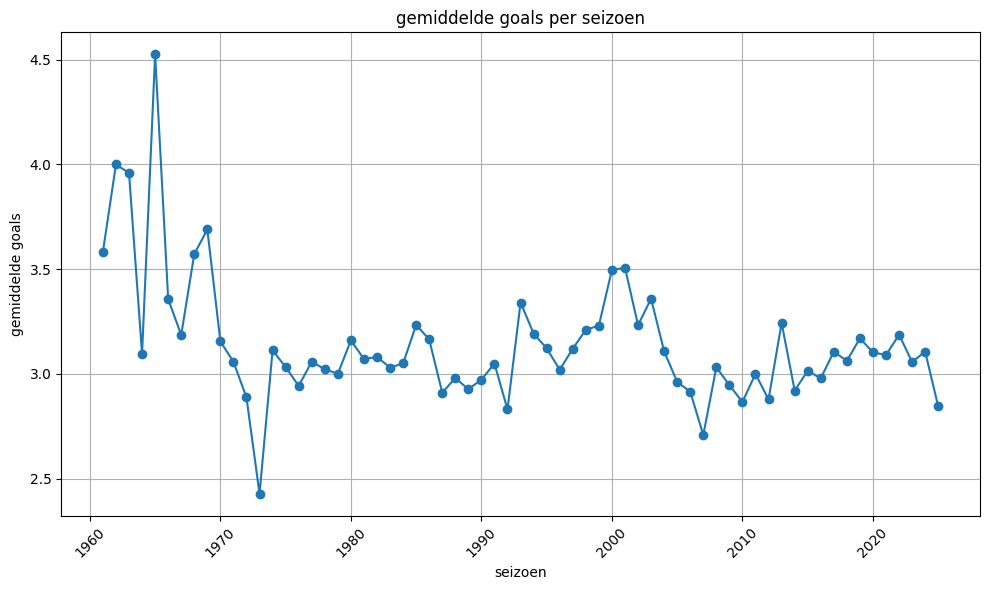

In [47]:
import matplotlib.pyplot as plt

# Zet de datekey terug naar een date
df['datekey'] = pd.to_datetime(df['datekey'], format='%Y%m%d')

# Zet de datum als de index
df.set_index('datekey', inplace=True)

# Herdefineer de dataframe voor per jaar
df_resampled = df.resample('Y').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['aantalDoelpunten'], marker='o', linestyle='-')
plt.title('gemiddelde goals per seizoen')
plt.xlabel('seizoen')
plt.ylabel('gemiddelde goals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
# Voor elk seizoen de gemiddelde goals tonen
seizoen = 60
for avgDoelpunten in df_resampled.aantalDoelpunten:
  print("siezoen", seizoen, ": ", avgDoelpunten)
  seizoen+=1

siezoen 60 :  3.5833333333333335
siezoen 61 :  4.0
siezoen 62 :  3.96
siezoen 63 :  3.0952380952380953
siezoen 64 :  4.526315789473684
siezoen 65 :  3.357142857142857
siezoen 66 :  3.185840707964602
siezoen 67 :  3.5714285714285716
siezoen 68 :  3.689655172413793
siezoen 69 :  3.1551724137931036
siezoen 70 :  3.0579710144927534
siezoen 71 :  2.8875
siezoen 72 :  2.426829268292683
siezoen 73 :  3.1122448979591835
siezoen 74 :  3.032608695652174
siezoen 75 :  2.9424083769633507
siezoen 76 :  3.0579710144927534
siezoen 77 :  3.022099447513812
siezoen 78 :  3.0
siezoen 79 :  3.16
siezoen 80 :  3.0709219858156027
siezoen 81 :  3.0807017543859647
siezoen 82 :  3.030075187969925
siezoen 83 :  3.049469964664311
siezoen 84 :  3.2338129496402876
siezoen 85 :  3.164335664335664
siezoen 86 :  2.9098039215686273
siezoen 87 :  2.98
siezoen 88 :  2.9267399267399266
siezoen 89 :  2.972
siezoen 90 :  3.049122807017544
siezoen 91 :  2.830188679245283
siezoen 92 :  3.3405797101449277
siezoen 93 :  3.1921

In [61]:
# Right-tailed z-test omdat we willen weten ofdat de mean van de van de sample kleiner is als de mean van de de populatie

# Properties of the sample:
n = len(nieuwe_data)      # sample size
sm = nieuwe_data.aantalDoelpunten.mean()  # sample mean = 3.102798982188295
s = historische_data.aantalDoelpunten.std()   # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = historische_data.aantalDoelpunten.mean()    # hypothetical population mean (H0)

In [62]:
import scipy.stats as stats
import numpy as np

# bereken de p value aan de hand van scipy methode
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)

if(p < a):
    # Als de p value kleiner is als alpha -> verwerp de
    print("p < a: reject H0")
else:
    # Als de p value groter is als alpha
    print("p > a: do not reject H0")

p-value: 0.28888
p > a: do not reject H0


In [63]:
# Critical value according to the formula in the lecture slides
#g = m0 + stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 3.143
sample mean = 3.103 < g = 3.143: do not reject H0
